This program implements the Hough transform for line detection.

**programmer**: Shih-Shinh Huang

**date**: 2022.11.03

In [1]:
import google.colab.patches as colab
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Hough transform') # change working directory

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Edge Detection**

##**load image from file and display image**

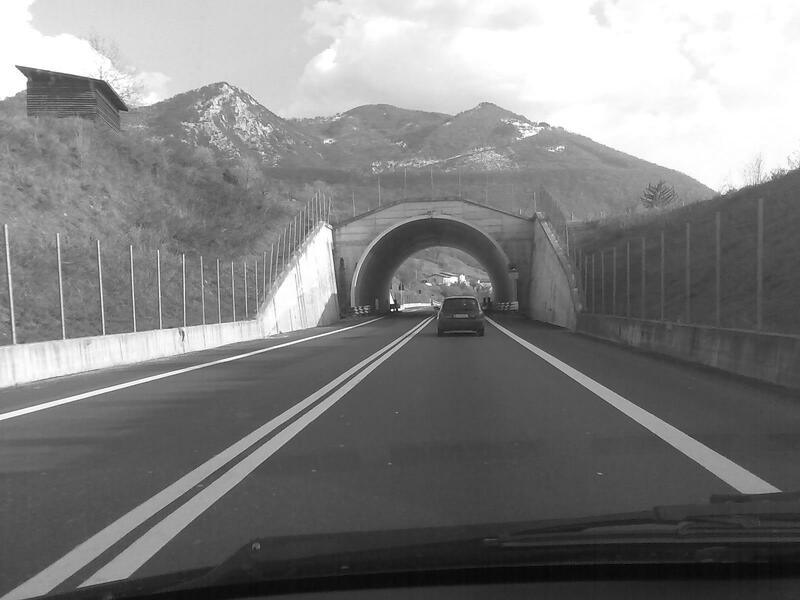

In [3]:
in_mat = cv2.imread("lane.jpg", 0)
colab.cv2_imshow(in_mat)

##**apply Canny edge detector**

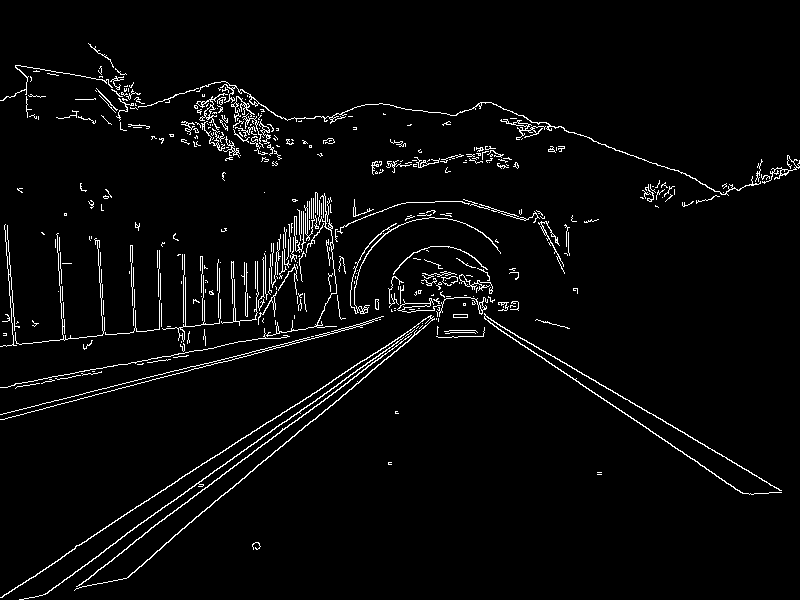

In [4]:
edge_mat = cv2.Canny(in_mat,100, 200)
colab.cv2_imshow(edge_mat)

#**Detection Algorithm**

##**quantize the $(\rho, \theta)$ parameter space**

generate a list of thetas in radius

In [5]:
thetas = list(range(-90,91))
thetas = np.asarray(thetas)
thetas = np.deg2rad(thetas) 

generate a list of rhos

In [6]:
# get the rows and cols of edge mat
rows, cols = edge_mat.shape

# compute the max rho
rho_max = np.ceil(np.sqrt(rows**2 + cols**2))
rho_max = int(rho_max)

rhos = list(range(-1*rho_max, rho_max+1))
rhos = np.asarray(rhos)

##**create the accumulator table and initialize it to zero**

In [7]:
# compute the number of rhos and thetas
n_rho = len(rhos)
n_theta = len(thetas)
accumulator = np.zeros((n_rho, n_theta), dtype=np.uint16)

##**use each point $(x,y)$ for voting possible $(\rho,\theta)$**

In [8]:
for r in range(rows):
  for c in range(cols):
    # skip the non-edge point
    if edge_mat[r, c] == 0:
      continue
    
    # get the point coordinate (x, y)
    x, y = c, r

    # vote for all thetas
    for theta_idx in range(n_theta):

      # compute the rho
      theta = thetas[theta_idx]
      rho = int(x * np.cos(theta) + y * np.sin(theta))

      # vote for (rho, theta)
      rho_idx = rho + rho_max
      accumulator[rho_idx, theta_idx] = accumulator[rho_idx, theta_idx] + 1

##**find the ($\rho$, $\theta$) that larger than the defined threshold**

load the image for drawing the detected lines

In [9]:
canvas_mat = cv2.imread("lane.jpg")

In [10]:
for rho_idx in range(n_rho):
  for theta_idx in range(n_theta):
    if accumulator[rho_idx, theta_idx] > 200:
      # get the rho and theta
      rho = rhos[rho_idx]
      theta = thetas[theta_idx]

      # get the first point
      x_1 = int(rho / np.cos(theta))
      y_1 = 0

      # get the second point
      if theta >= 0:
        x_2 = int(0)
        y_2 = int(rho / np.sin(theta))
      else:
        x_2 = int(in_mat.shape[1] - 1)
        y_2 = int((rho - x_2 * np.cos(theta)) / np.sin(theta))

      # draw the lines
      cv2.line(canvas_mat,(x_1, y_1),(x_2, y_2), (0, 0, 255), 1)

show the detected lines

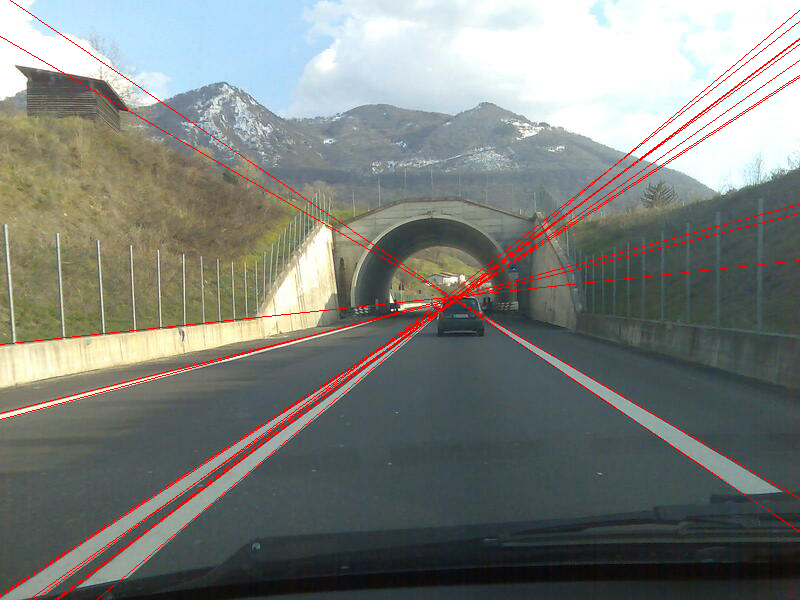

In [11]:
colab.cv2_imshow(canvas_mat)

display the accumulator

(2001, 181)


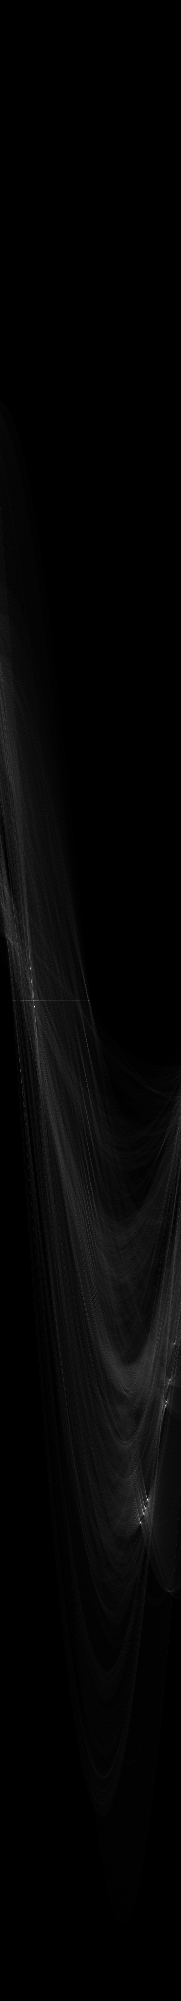

In [12]:
accumulator = cv2.normalize(accumulator, None, 0, 255, norm_type=cv2.NORM_MINMAX)
print(f'{accumulator.shape}')
colab.cv2_imshow(accumulator)